In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
import concurrent.futures

In [3]:

def gibbs(n):
    x=0
    y=0
    thining=500
    abscisse = []
    ordo = []
    for i in range(n):
        for j in range(thining):
            x=np.random.gamma(3,1.0/(y*y+4))
            y=np.random.normal(1.0/(x+1),1.0/np.sqrt(x+1))
        abscisse.append(x)
        ordo.append(y)
    return abscisse, ordo
t_init = time.time()
sample_results = gibbs(20000)


############################ Affichage du temps d'exécution ####################################


print("Le temps d'exécution est de  %s secondes"%(time.time()-t_init))

Le temps d'exécution est de  71.45273399353027 secondes


### <center>Faster version using multiprocessing

In [4]:
final_samples = [], []
def gibbs2(n):
    x=0
    y=0
    thining=500
    abscisse = []
    ordo = []
    for i in range(n):
        for j in range(thining):
            x=np.random.gamma(3,1.0/(y*y+4))
            y=np.random.normal(1.0/(x+1),1.0/np.sqrt(x+1))
        abscisse.append(x)
        ordo.append(y)
    return abscisse, ordo

############################ Début de la parallélisation ####################################
def gibbs_distribue(obs, n_process):
    
    n = round(obs/n_process)
    with concurrent.futures.ProcessPoolExecutor() as executor:
        results =[executor.submit(gibbs2,n) for _ in range(n_process)]
        for f in concurrent.futures.as_completed(results):
            final_samples[0].append(f.result()[0])
            final_samples[1].append(f.result()[1])
            

############################ Affichage du temps d'exécution ####################################
t_init = time.time()
gibbs_distribue(20000,5)
print("Le temps d'exécution est de  %s secondes"%(time.time()-t_init))

Le temps d'exécution est de  22.95964288711548 secondes


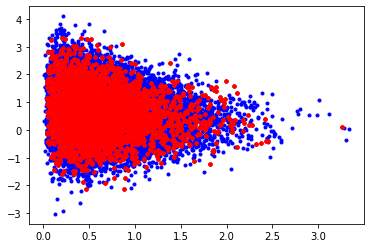

In [9]:
final_x = final_samples[0][0] + final_samples[0][1] + final_samples[0][2] + final_samples[0][3] + final_samples[0][4]
final_y = final_samples[1][0] + final_samples[1][1] + final_samples[1][2] + final_samples[1][3] + final_samples[1][4]
plt.plot(sample_results[0], sample_results[1],'.',color='blue')

plt.plot(final_x, final_y,'.',color='red')
